In [43]:
import pandas as pd
import seaborn as sb

df = pd.read_csv('./housing.csv')

In [44]:
data = df.dropna() # eliminar todos los registros que tenga null en alguna columna

In [45]:
#data.corr()['median_house_value'].sort_values(ascending=False)

In [46]:
#Convertir variables categóricas a numéricas:


# datos dummies para cambiar los valores a binarios
dummies = pd.get_dummies(data['ocean_proximity'], dtype=int)

#concatenar las columnas a la data
data = pd.concat([data, dummies], axis=1)

#Eliminar la columna original
data.drop('ocean_proximity', axis=1, inplace=True)

In [47]:
#Creo un nuevo Data convalidando los valores nulos nuevamente
prueba = data.dropna()

<Axes: >

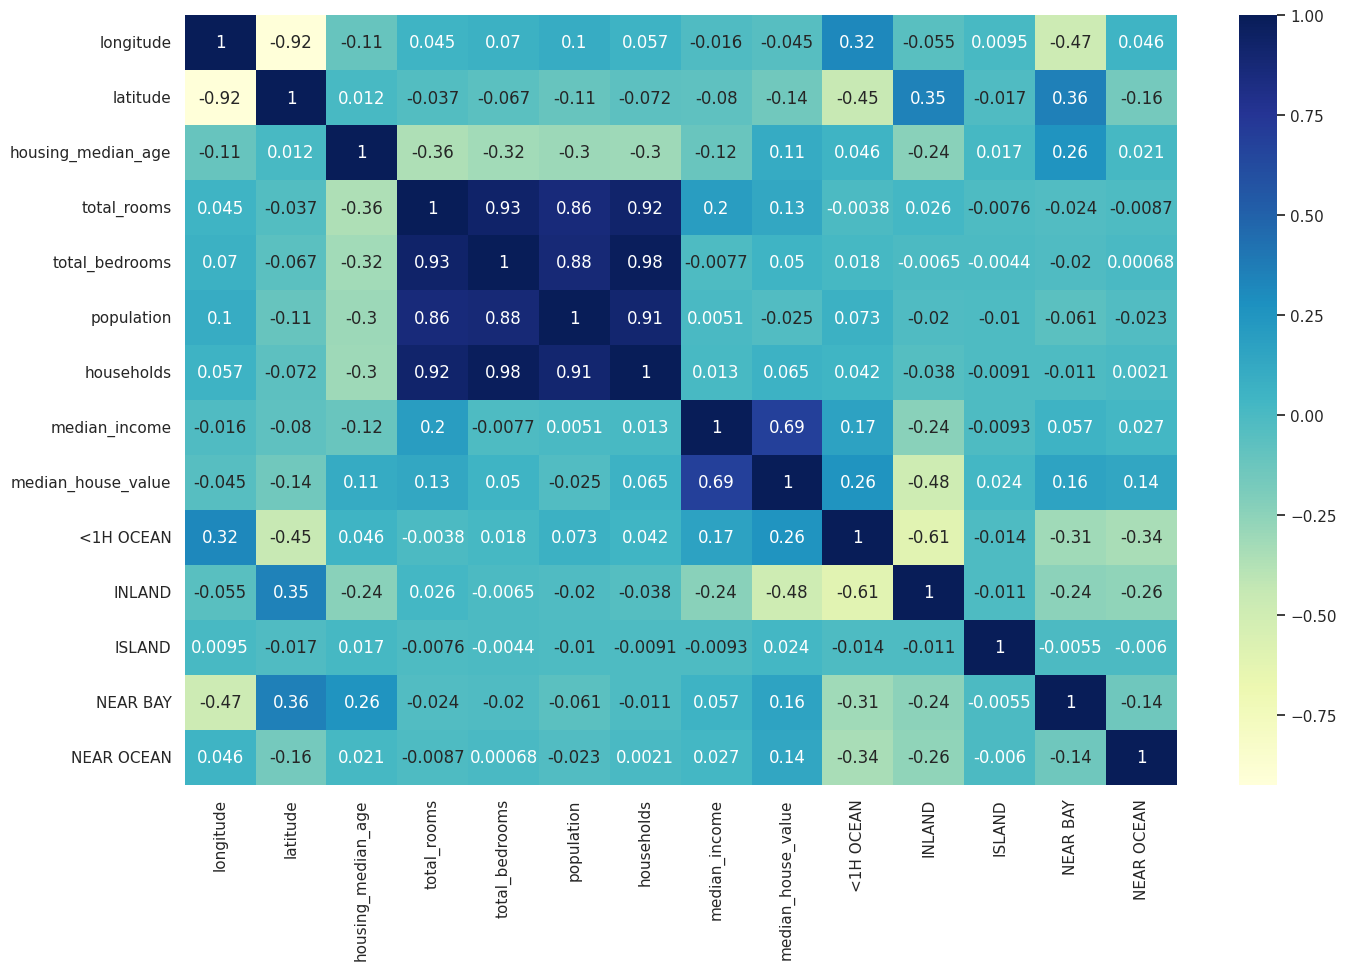

In [48]:
sb.set(rc={'figure.figsize':(16,10)})
sb.heatmap(data=prueba.corr(), annot=True, cmap='YlGnBu' )

**Trabajamos en en Modelo Arbol de Decisión:**

In [49]:
#obtener las caracteristicas y la etiqueta

#Caracteristicas:
X = prueba.drop('median_house_value', axis=1) # Agregamos toda la data, eliminando la columna etiqueta

# Etiqueta:
y = prueba['median_house_value']

In [55]:
#Separamos las caracteristicas:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Elegimos la profundida del arbol
modelTree = DecisionTreeRegressor(max_depth=5)
modelTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [57]:
prediccionesTree = modelTree.predict(X_test)

In [58]:

modelTree.score(X_test, y_test)

0.6581142666753013

[Text(0.5, 0.9166666666666666, 'median_income <= 5.132\n13390846090.177\n16346\n206952.519'),
 Text(0.25, 0.75, 'INLAND <= 0.5\n8490609378.412\n13139\n175031.44'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'median_income <= 3.123\n8280125526.24\n8417\n209768.039'),
 Text(0.0625, 0.4166666666666667, 'median_income <= 2.348\n6127408009.656\n3628\n172461.613'),
 Text(0.03125, 0.25, 'total_bedrooms <= 714.5\n5769715350.252\n1685\n153065.824'),
 Text(0.015625, 0.08333333333333333, '4922237710.538\n1371\n144578.125'),
 Text(0.046875, 0.08333333333333333, '7782063726.1\n314\n190125.175'),
 Text(0.09375, 0.25, 'longitude <= -118.285\n5828437520.962\n1943\n189281.945'),
 Text(0.078125, 0.08333333333333333, '7830341776.364\n1053\n206460.795'),
 Text(0.109375, 0.08333333333333333, '2697621491.422\n890\n168956.856'),
 Text(0.1875, 0.4166666666666667, 'longitude <= -118.315\n8057844214.048\n4789\n238030.246'),
 Text(0.15625, 0.25, 'latitude <= 34.165\n9047779655.5

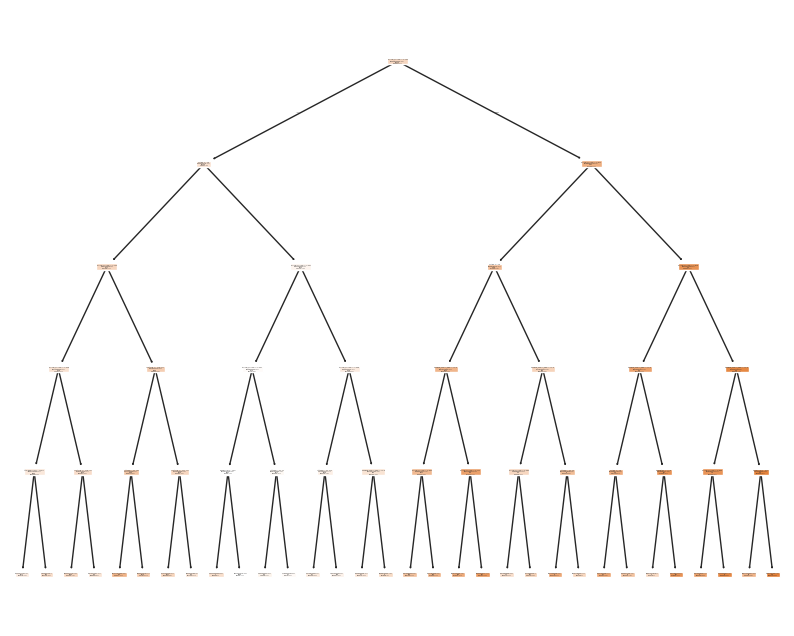

In [54]:
#Mostramos el arbol

from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
plot_tree(
    modelTree,
    feature_names=X_train.columns,
    filled=True,
    label='none'
)